# 1. Introduction

# Libraries and Data importation

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
# Import full dataframe
df = pd.read_parquet(r"C:\Users\mirko\Desktop\Curso Data Science DL\EDAHospDischarges_Chile2001-2024\data\processed\Discharges_2001-2024_bivariate_final.parquet")

# 2. Data Overview

In [170]:
# Shape of the dataset (rows, columns).

In [171]:
df.head()

,sex,age,health insurance,healthcare facility type,healthcare facility name,length of stay,discharge condition,primary diagnosis code,primary diagnosis name,year,chapter codes,chapter names,LOS_capped,group codes,group names
0,Male,60-69,Fonasa,Private,Clínica Familia,2,Deceased,C780,tumor maligno secundario del pulmon,2001,C00-D48,tumores [neoplasias],2,C76-C80,tumores [neoplasias] malignos de sitios mal de...
1,Male,70-79,Fonasa,Public,"Hospital Del Salvador (Santiago, Providencia)",58,Deceased,E145,"diabetes mellitus no especificada, con complic...",2001,E00-E90,"enfermedades endocrinas, nutricionales y metab...",58,E10-E14,diabetes mellitus
2,Male,70-79,Fonasa,Public,"Hospital Del Salvador (Santiago, Providencia)",12,Deceased,J189,"neumonia, no especificada",2001,J00-J99,enfermedades del sistema respiratorio,12,J09-J18,influenza [gripe] y neumonía
3,Male,1-9,Fonasa,Public,Instituto de Neurocirugía Dr. Alfonso Asenjo,1,Deceased,S065,hemorragia subdural traumatica,2001,S00-T98,"traumatismos, envenenamientos y algunas otras ...",1,S00-S09,traumatismos de la cabeza
4,Male,80-120,Fonasa,Public,Hospital Dr. Leonardo Guzmán (Antofagasta),7,Alive,K830,colangitis,2001,K00-K93,enfermedades del sistema digestivo,7,K80-K87,"trastornos de la vesícula biliar, de las vías ..."


In [172]:
df.shape

(25758741, 15)

# Data dictionary / main variables (categorical, numerical).

In [174]:
# Data type customization really helped to reduce memory usage, increasing speed and capacity to create new columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25758741 entries, 0 to 25758740
Data columns (total 15 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   sex                       category
 1   age                       category
 2   health insurance          category
 3   healthcare facility type  category
 4   healthcare facility name  object  
 5   length of stay            int32   
 6   discharge condition       category
 7   primary diagnosis code    category
 8   primary diagnosis name    category
 9   year                      int32   
 10  chapter codes             category
 11  chapter names             object  
 12  LOS_capped                int32   
 13  group codes               category
 14  group names               category
dtypes: category(10), int32(3), object(2)
memory usage: 1.0+ GB


# ACTUALIZAR VARIABLES

# Missing values / NA treatment summary.

In [177]:
# Dataframe is cleaned from previous steps
df.isna().sum()

sex                         0
age                         0
health insurance            0
healthcare facility type    0
healthcare facility name    0
length of stay              0
discharge condition         0
primary diagnosis code      0
primary diagnosis name      0
year                        0
chapter codes               0
chapter names               0
LOS_capped                  0
group codes                 0
group names                 0
dtype: int64

# First impressions after bivariate analysis (anything noteworthy?). HACERLO

# List of pairs of variables to perform bivariate analysis (CHECK CHAT GPT CONVERSATION TO HAVE MORE GUIDANCE). POR HACER

# 3. Multivariate analysis (RECUERDA SIEMPRE RELACIONAR CON PREGUNTAS GUIA)

In [ ]:
7️⃣ Presentation

Visual-first narrative: Every key insight supported by a clean plot.
Aggregated data summaries: Tables of medians, IQRs, proportions.
Optional “analytic rigor”: Call out effect sizes (differences, CVs) to satisfy technical reviewers.
Avoid unnecessary p-values: With 250k+ sampled rows, p-values are trivial — visuals + effect sizes tell the story.

# 2. Purpose / Guiding Question


# 3. Exploratory Multivariate Visualization (Descriptive Level)

# 5. Insights and Synthesis

# Structure

# Estructura opción 2:

# 1. Group 1: [Diagnosis] x [Age] x [Sex] x [Insurance]

# 1. Objective & Variables

# 2. Descriptive Overview (Base Tables)

In [185]:
# Count diagnoses
diagnosis_counts = df['group names'].value_counts()

# Select top 15
top15_diagnoses = diagnosis_counts.head(15).index.tolist()

# Create a copy of the column
diag_grouped = df['group names'].copy()

# Convert to categorical if not already
diag_grouped = diag_grouped.astype('category')

# Add 'Other' as a category
if 'Other' not in diag_grouped.cat.categories:
    diag_grouped = diag_grouped.cat.add_categories('Other')

# Replace all diagnoses not in top 15 with 'Other'
diag_grouped = diag_grouped.where(diag_grouped.isin(top15_diagnoses), 'Other')

# Optional: attach it back to the dataframe
df['Diagnosis_grouped'] = diag_grouped

# Check the result
df['Diagnosis_grouped'].value_counts()


Diagnosis_grouped
Other                                                                    15817408
trastornos de la vesícula biliar, de las vías biliares y del páncreas     1508792
influenza [gripe] y neumonía                                              1302182
enfermedades del apéndice                                                  810863
otras formas de enfermedad del corazón                                     687480
                                                                           ...   
malformaciones congénitas del sistema nervioso                                  0
malformaciones congénitas del sistema respiratorio                              0
malformaciones congénitas del sistema urinario                                  0
malformaciones y deformidades congénitas del sistema osteomuscular              0
otros trastornos articulares                                                    0
Name: count, Length: 218, dtype: int64

In [188]:
# Counts

In [190]:
ct_g_1 = pd.crosstab(index=[df['age'], df['sex'], df["health insurance"]], columns=df['Diagnosis_grouped'])

In [191]:
ct_g_1

Diagnosis_grouped               enfermedades cerebrovasculares  \
age    sex    health insurance                                   
0-1    Male   Fonasa                                       377   
              Isapre                                        95   
       Female Fonasa                                       194   
              Isapre                                        58   
1-9    Male   Fonasa                                       688   
              Isapre                                       112   
       Female Fonasa                                       433   
              Isapre                                       104   
10-19  Male   Fonasa                                      1443   
              Isapre                                       281   
       Female Fonasa                                       964   
              Isapre                                       242   
20-29  Male   Fonasa                                      2633   
              Isapre                                       769   
       Female Fonasa                                      2667   
              Isapre                                       790   
30-39  Male   Fonasa                                      6179   
              Isapre                                      1970   
       Female Fonasa                                      6268   
              Isapre                                      2065   
40-49  Male   Fonasa                                     18148   
              Isapre                                      3522   
       Female Fonasa                                     16795   
              Isapre                                      3305   
50-59  Male   Fonasa                                     44794   
              Isapre                                      5742   
       Female Fonasa                                     30132   
              Isapre                                      4027   
60-69  Male   Fonasa                                     76752   
              Isapre                                      6772   
       Female Fonasa                                     45486   
              Isapre                                      3789   
70-79  Male   Fonasa                                     82152   
              Isapre                                      5452   
       Female Fonasa                                     61067   
              Isapre                                      3373   
80-120 Male   Fonasa                                     51655   
              Isapre                                      3518   
       Female Fonasa                                     65575   
              Isapre                                      3565   

Diagnosis_grouped               enfermedades crónicas de las vías respiratorias inferiores   \
age    sex    health insurance                                                                
0-1    Male   Fonasa                                                        35779             
              Isapre                                                         2133             
       Female Fonasa                                                        17880             
              Isapre                                                         1060             
1-9    Male   Fonasa                                                        35329             
              Isapre                                                         5893             
       Female Fonasa                                                        22960             
              Isapre                                                         3640             
10-19  Male   Fonasa                                                         8688             
              Isapre                                                         1829             
       Female Fonasa                                                         6636      

In [192]:
# Proportions

In [193]:
ct_g_1_norm = pd.crosstab(index=[df['age'], df['sex'], df["health insurance"]], columns=df['Diagnosis_grouped'], normalize = 'index')

In [195]:
ct_g_1_norm.index = [
    f"{sex} | {insurance} | {age}" 
    for sex, insurance, age in ct_g_1_norm.index
]


In [198]:
ct_g_1_norm

Diagnosis_grouped,enfermedades cerebrovasculares,enfermedades crónicas de las vías respiratorias inferiores,enfermedades de los órganos genitales masculinos,enfermedades del apéndice,enfermedades infecciosas intestinales,enfermedades isquémicas del corazón,hernia,influenza [gripe] y neumonía,otras enfermedades de las vías respiratorias superiores,otras enfermedades de los intestinos,otras formas de enfermedad del corazón,"trastornos de la vesícula biliar, de las vías biliares y del páncreas",trastornos no inflamatorios de los órganos genitales femeninos,traumatismos de la cabeza,tumores [neoplasias] benignos,Other
0-1 | Male | Fonasa,0.000336,0.031906,0.005237,0.000930,0.050229,0.000043,0.015441,0.160178,0.003332,0.005116,0.001581,0.000315,0.000000,0.012844,0.001796,0.710716
0-1 | Male | Isapre,0.000589,0.013216,0.020633,0.000744,0.064296,0.000081,0.029673,0.093349,0.013191,0.007491,0.001543,0.000607,0.000000,0.021265,0.003402,0.729922
0-1 | Female | Fonasa,0.000254,0.023415,0.000000,0.000829,0.048903,0.000041,0.008470,0.145440,0.002741,0.003710,0.001765,0.000452,0.000380,0.012731,0.002216,0.748654
0-1 | Female | Isapre,0.000515,0.009416,0.000000,0.000702,0.063946,0.000071,0.020270,0.091570,0.010499,0.004850,0.001874,0.000844,0.000862,0.022357,0.004495,0.767730
1-9 | Male | Fonasa,0.000662,0.034001,0.073655,0.064617,0.048004,0.000081,0.017449,0.093091,0.107539,0.011422,0.001646,0.001119,0.000000,0.036340,0.005829,0.504545
1-9 | Male | Isapre,0.000415,0.021855,0.156526,0.041304,0.050030,0.000045,0.020164,0.060830,0.174239,0.007421,0.001480,0.001769,0.000000,0.037013,0.007703,0.419206
1-9 | Female | Fonasa,0.000657,0.034818,0.000002,0.059443,0.054319,0.000058,0.016191,0.120095,0.116334,0.010429,0.002250,0.002064,0.001098,0.030183,0.008178,0.543882
1-9 | Female | Isapre,0.000654,0.022885,0.000000,0.041457,0.064877,0.000069,0.021099,0.087975,0.208511,0.008035,0.001773,0.002483,0.001125,0.036434,0.011927,0.490695
10-19 | Male | Fonasa,0.001687,0.010158,0.041509,0.151288,0.020904,0.000537,0.008461,0.022412,0.038203,0.010434,0.005516,0.009502,0.000000,0.042897,0.008888,0.627605
10-19 | Male | Isapre,0.001277,0.008314,0.077326,0.116634,0.028239,0.000186,0.010469,0.013829,0.073712,0.007655,0.006723,0.008610,0.000000,0.039481,0.014356,0.593187


In [201]:
ct_g_1_norm = ct_g_1_norm.drop(columns='Other')

In [204]:
# Drop 'Other' column
crosstab_top15_g1 = ct_g_1.drop(columns='Other')

# Normalize by row (proportions within top 15)
crosstab_top15_g1 = crosstab_top15_g1.div(crosstab_top15_g1.sum(axis=1), axis=0)

# Flatten MultiIndex for plotting
crosstab_top15_g1.index = [
    f"{sex} | {insurance} | {age}" 
    for sex, insurance, age in crosstab_top15_g1.index]

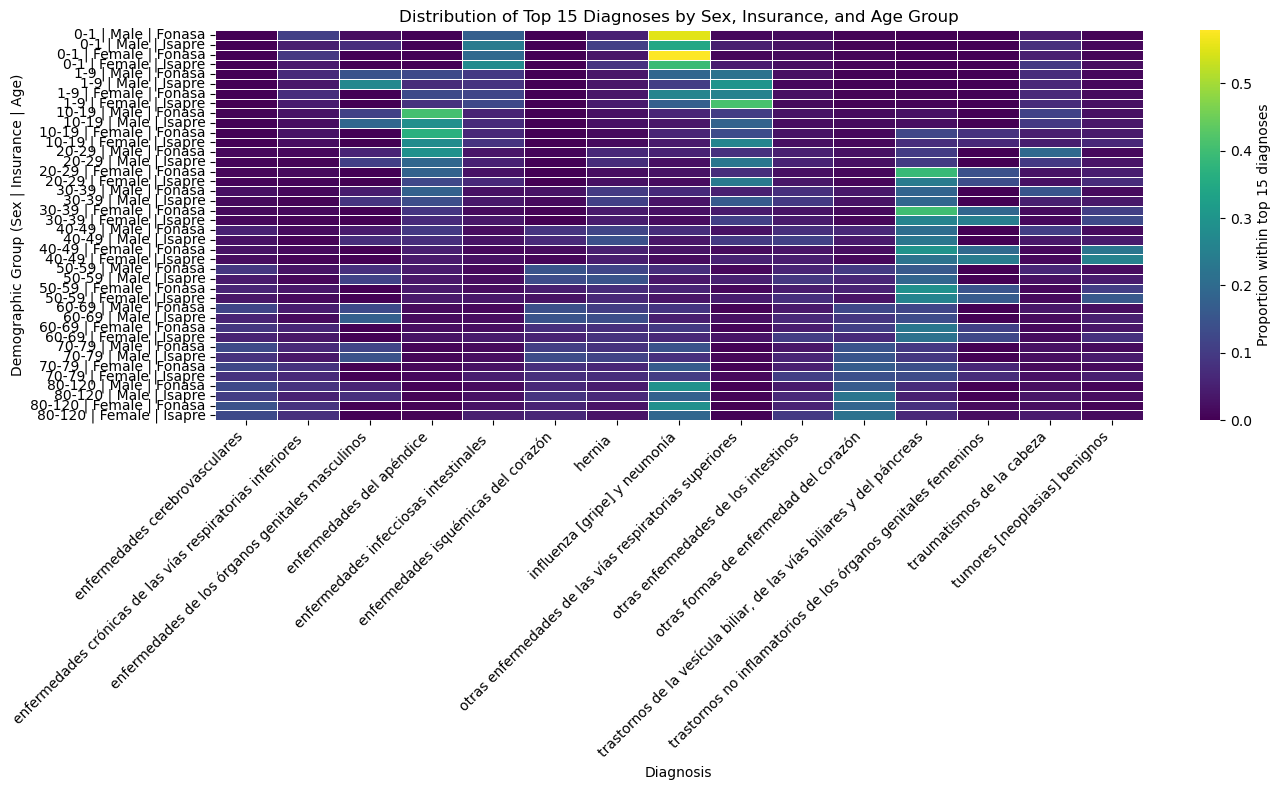

In [206]:

# 5️⃣ Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    crosstab_top15_g1, 
    cmap='viridis', 
    linewidths=0.5,
    cbar_kws={'label': 'Proportion within top 15 diagnoses'}
)
plt.title('Distribution of Top 15 Diagnoses by Sex, Insurance, and Age Group')
plt.xlabel('Diagnosis')
plt.ylabel('Demographic Group (Sex | Insurance | Age)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

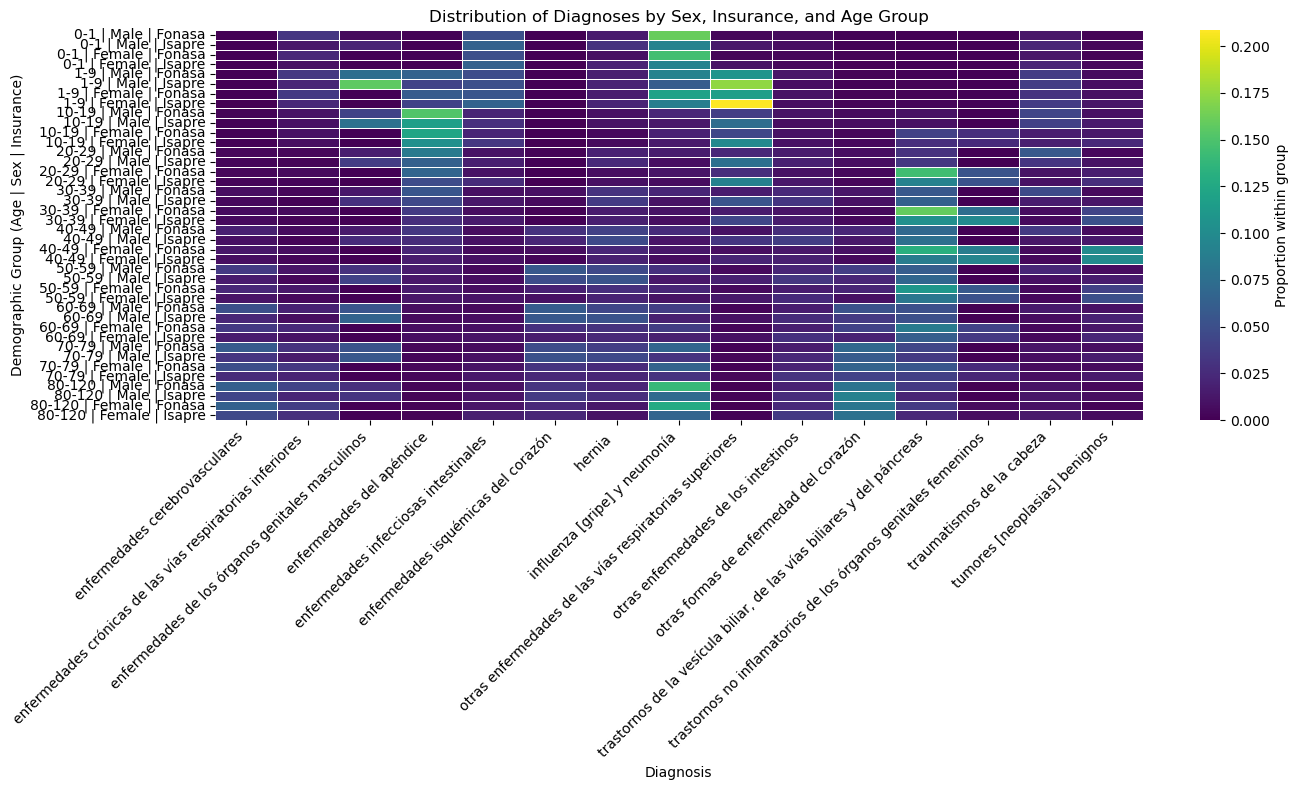

In [208]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    ct_g_1_norm, 
    cmap='viridis',  # or 'YlGnBu', 'mako', etc.
    linewidths=0.5,
    cbar_kws={'label': 'Proportion within group'}
)

plt.title('Distribution of Diagnoses by Sex, Insurance, and Age Group')
plt.xlabel('Diagnosis')
plt.ylabel('Demographic Group (Age | Sex | Insurance)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# REVISAR QUE CROSSTABS ESTEN BIEN ANTES DE SEGUIR

# 3. Visual Exploration (Core Plots)

# 4. Concentration & Distribution Insights

# 5. Conditional Relationships (3D Exploration)

# 6. Normalized Profiles (Share-of-Group vs. Share-of-Total)

# 7. Outlier & Exception Analysis

# 8. Effect Size Indicators (Descriptive)

# 9. Interpretation & Contextualization

# 10. Insight Blocks (Mini Stories)

# 11. Optional: Synthesis Dashboard (for the Report) --> One-pager structure. Fill it usign univariate an bivariate stages as well